----------------------------------------

# Project: Unsupervised Learning


-----------------------------------------



---------------------------
## Background: 
-----------------------------
AllLife Bank wants to focus on its credit card customer base in the next
financial year. They have been advised by their marketing research team, that the
penetration in the market can be improved. Based on this input, the Marketing team
proposes to run personalised campaigns to target new customers as well as upsell to
existing customers. Another insight from the market research was that the customers
perceive the support services of the back poorly. Based on this, the Operations team
wants to upgrade the service delivery model, to ensure that customers queries are
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the
Data Science team for help.
Objective: To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank.

--------------------------
## About the data:
-----------------
The data has customers as a data points with the following features-
- Sl_no - Customer Serial Number
- Customer Key - Customer identification
- Avg_Credit_Limit	- Average credit limit(currency less)
- Total_Credit_Cards	- Total number of credit cards 
- Total_visits_bank	- Total bank visits
- Total_visits_online -	 Total online visits
- Total_calls_made - Total calls made



## Resources
-------------------------------------

- Kmeans documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- GMM documentation - https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
- DBSCAN - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


Wishing you all the best!

In [27]:


import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.cluster import KMeans

import sklearn
import sklearn.metrics


In [28]:
import warnings
warnings.filterwarnings('ignore') 


pd.options.display.float_format = '{:,.2f}'.format        


sns.set_style(style='darkgrid')

### 1. Read the data file 


In [29]:

df = pd.read_excel('Credit Card Customer Data.xlsx', index_col=0)



In [30]:
df.shape

(660, 6)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB


In [32]:

df.duplicated().sum()

0

In [33]:

df.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

### 2. Find the number of unique entries in each of the columns. 


In [34]:

df.nunique()


Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

**Add inference from the above observation about the Customer Key feature here**

In [35]:

duplicate_keys = df['Customer Key'].duplicated()
df[duplicate_keys]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
333,47437,17000,7,3,1,0
399,96929,67000,6,2,2,2
433,37252,59000,6,2,1,2
542,50706,60000,7,5,2,2
633,97935,187000,7,1,7,0


In [36]:
df = df[~duplicate_keys]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 1 to 660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         655 non-null    int64
 1   Avg_Credit_Limit     655 non-null    int64
 2   Total_Credit_Cards   655 non-null    int64
 3   Total_visits_bank    655 non-null    int64
 4   Total_visits_online  655 non-null    int64
 5   Total_calls_made     655 non-null    int64
dtypes: int64(6)
memory usage: 35.8 KB


### 3. Drop the columns Sl_No and Customer Key(1 mark)

In [37]:

df.drop(columns = ['Customer Key'], inplace = True) #it will return nothing and the dataframe is now updated


In [38]:
df.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
1,100000,2,1,1,0
2,50000,3,0,10,9
3,50000,7,1,3,4


In [39]:
df[df.duplicated()]


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
163,8000,2,0,3,4
176,6000,1,0,2,5
216,8000,4,0,4,7
296,10000,6,4,2,3
325,9000,4,5,0,4
362,18000,6,3,1,4
379,12000,6,5,2,1
386,8000,7,4,2,0
396,5000,4,5,0,1


In [40]:
df=df[~df.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 1 to 660
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     644 non-null    int64
 1   Total_Credit_Cards   644 non-null    int64
 2   Total_visits_bank    644 non-null    int64
 3   Total_visits_online  644 non-null    int64
 4   Total_calls_made     644 non-null    int64
dtypes: int64(5)
memory usage: 30.2 KB


### 4. Visualise through box plot  


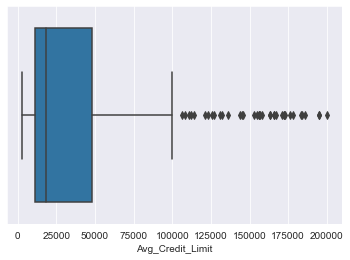

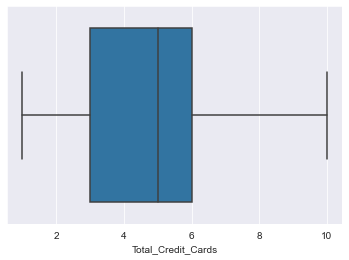

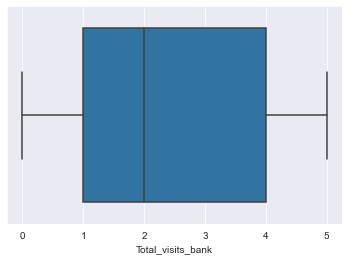

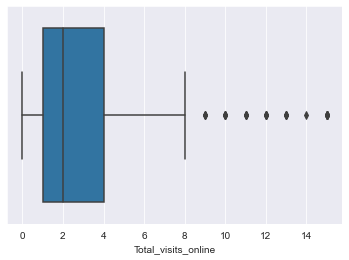

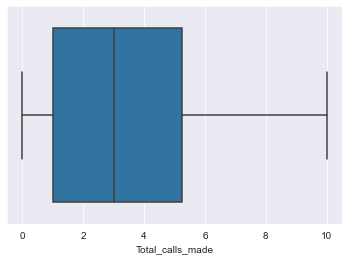

In [41]:

features = list(df.columns)


def boxplots_plot(features, df):
   for i in features:
     sns.boxplot( y=i, data=df, orient='h') 
     plt.show()
  

boxplots_plot(features, df)


### 5. Draw the correlation heatmap with annotation

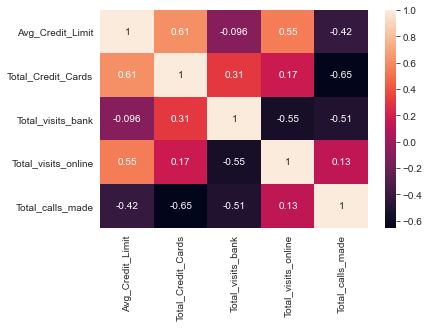

In [42]:
sns.heatmap(df.corr(), annot = True)

### 6. Scale the dataset, create a dataframe for the scaled value and display the top 3 entries 


In [43]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_scaled = mms.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled)

df_scaled.columns = features


df_scaled.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.49,0.11,0.20,0.07,0.00
1,0.24,0.22,0.00,0.67,0.90
2,0.24,0.67,0.20,0.20,0.40


In [44]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.00,0.16,0.19,0.00,0.04,0.08,0.23,1.00
Total_Credit_Cards,644.00,0.41,0.24,0.00,0.22,0.44,0.56,1.00
Total_visits_bank,644.00,0.48,0.33,0.00,0.20,0.40,0.80,1.00
Total_visits_online,644.00,0.17,0.20,0.00,0.07,0.13,0.27,1.00
Total_calls_made,644.00,0.36,0.29,0.00,0.10,0.30,0.53,1.00


### 7. Elbow Plot

#### K-Means clustering


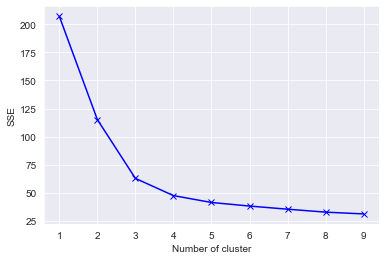

In [45]:

sse = {} 


for k in range(1, 10):
     kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=12).fit(df_scaled)
     sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### 8. Fit the KMeans clustering 

In [46]:


kmeans = KMeans(n_clusters=3, max_iter= 1000, random_state=12)
kmeans.fit(df_scaled) 
df_scaled['Labels'] = kmeans.predict(df_scaled) 



### 9. Generate the boxplot for all the features that cleary differentiates among the clusters

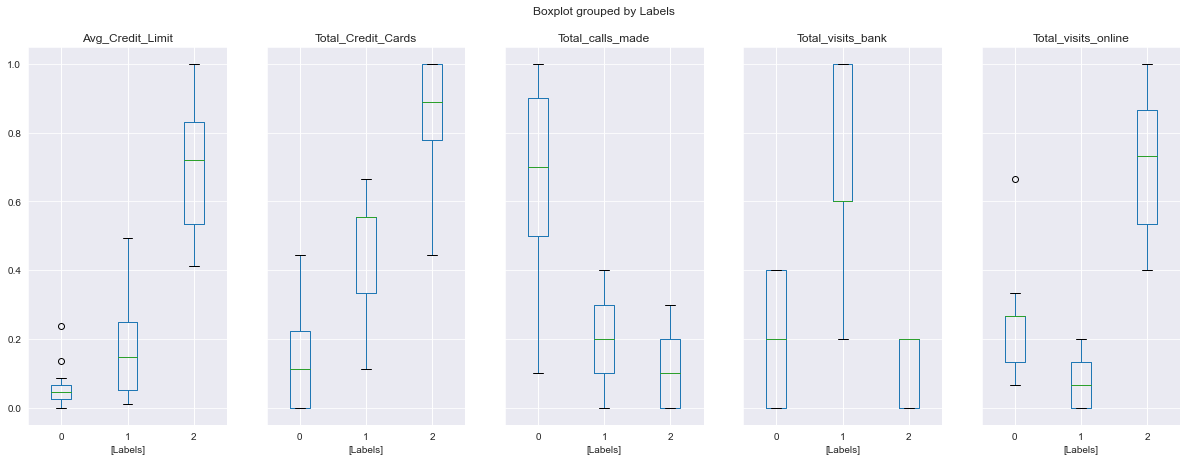

In [47]:

df_scaled.boxplot(by = 'Labels', layout = (1,5),figsize=(20,7))
plt.show()

### 10. Implement the Gaussian Mixture Model clustering and generate the boxplot as above 


In [48]:
from sklearn.mixture import GaussianMixture



gmm = GaussianMixture(n_components = 3, random_state = 12)
gmm.fit(df_scaled) 
df_scaled['GmmLabels'] = gmm.predict(df_scaled)




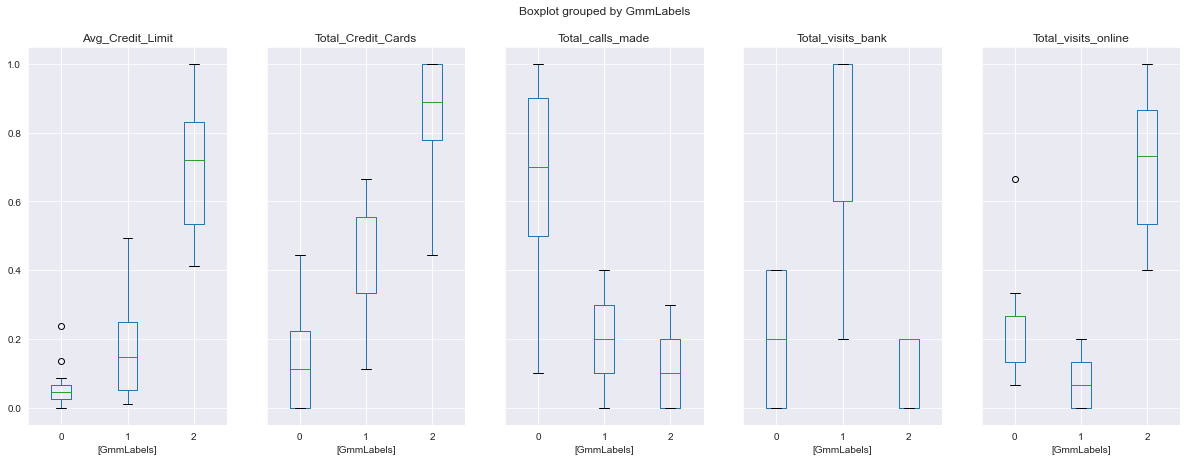

In [49]:


new_features = ["Avg_Credit_Limit",	"Total_Credit_Cards",	"Total_visits_bank",	"Total_visits_online",	"Total_calls_made","GmmLabels"]
df_scaled[new_features].boxplot(by = 'GmmLabels', layout = (1,5),figsize=(20,7))
plt.show()

### 11. Use the DBSCAN clustering with the eps = 0.5 and other parameters 

In [50]:
from sklearn.cluster import DBSCAN



dbs = DBSCAN(eps = 0.5)

df_scaled['DBSLabels'] = dbs.fit_predict(df_scaled)
df_scaled


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels,GmmLabels,DBSLabels
0,0.49,0.11,0.20,0.07,0.00,1,1,0
1,0.24,0.22,0.00,0.67,0.90,0,0,1
2,0.24,0.67,0.20,0.20,0.40,1,1,0
3,0.14,0.44,0.20,0.07,0.40,0,0,1
4,0.49,0.56,0.00,0.80,0.30,2,2,2
...,...,...,...,...,...,...,...,...
639,0.49,1.00,0.20,0.67,0.00,2,2,2
640,0.41,1.00,0.20,0.87,0.20,2,2,2
641,0.72,0.78,0.20,0.60,0.10,2,2,2
642,0.86,1.00,0.20,1.00,0.00,2,2,2


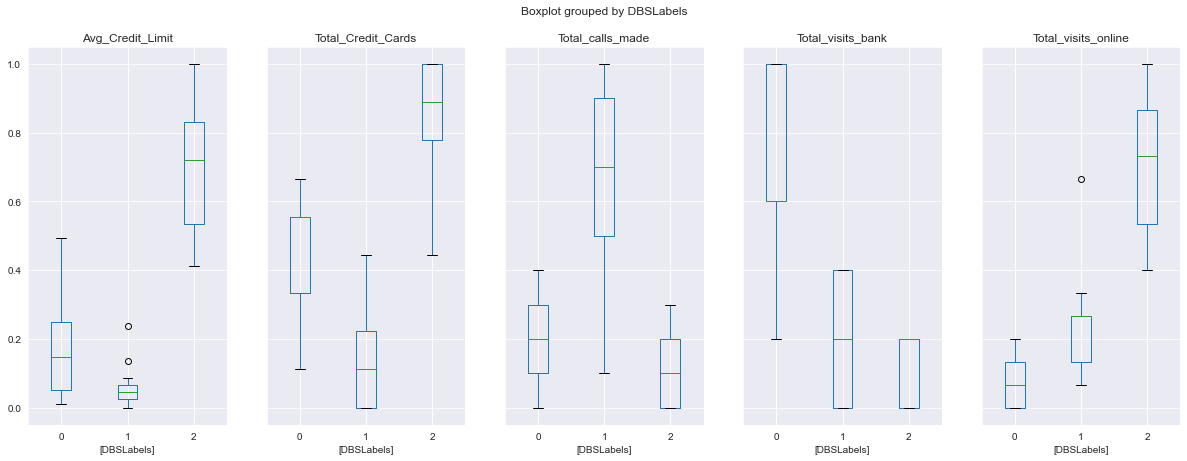

In [51]:


new_features = ["Avg_Credit_Limit",	"Total_Credit_Cards",	"Total_visits_bank",	"Total_visits_online",	"Total_calls_made","DBSLabels"]

df_scaled[new_features].boxplot(by = 'DBSLabels', layout = (1,5),figsize=(20,7))
plt.show()

### 12. Print the cluster sizes and add comments from the different clustering techniques (3 marks)

- Print the cluster size (2 marks)
- Comments and interpretations (1 mark)



In [52]:
# Uncomment below. Use a function that can give the count of all the different values in a column


print('Cluster sizes in Kmeans:')
print(df_scaled['Labels'].count())
print()

print('Cluster sizes in GMM:')
print(df_scaled['GmmLabels'].count())
print()

print('Cluster sizes in DBSCAN')
print(df_scaled['DBSLabels'].count())  

Cluster sizes in Kmeans:
644

Cluster sizes in GMM:
644

Cluster sizes in DBSCAN
644


#### Write your comments and interpretations here

